## Problem statement


[33.33333333 33.33333333 33.33333333]
Generated solutions in the first quadrant:


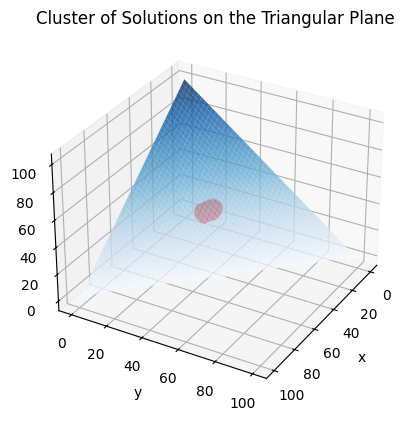

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define matrix A and b
A = np.array([[1, 1, 1]])  # Coefficient matrix
b = np.array([100])  # Right-hand side vector

# Compute the pseudo-inverse of A to find a particular solution
x_p = np.linalg.pinv(A) @ b
print(x_p)
# Correct null space for A: The null space basis should be 3x2 matrix
# The null space basis for A can be manually derived as:
null_space = np.array([[-1, 1], [1, 0], [0, -1]])

# Generate a dense cluster of solutions in the first quadrant
solutions = []

# Generate 100 random solutions in the first quadrant (clustered)
num_solutions = 1000
for _ in range(num_solutions):
    # Random positive coefficients for null space vectors
    coeff1 = np.random.normal(0, 1)
    coeff2 = np.random.normal(0, 1)

    # Compute a new solution as a linear combination of x_p and null space vectors
    solution = x_p.flatten() + null_space[:, 0] * coeff1 + null_space[:, 1] * coeff2
    
    # Check if the solution is non-negative (i.e., lies in the first quadrant)
    if np.all(solution >= 0):
        solutions.append(solution)

# Convert the solutions list to a numpy array for easier handling
solutions = np.array(solutions).T

# Display the generated solutions
print('Generated solutions in the first quadrant:')
#print(solutions)

# Create a meshgrid for visualization of the solution space
x = np.linspace(0, 100, 100)
y = np.linspace(0, 100, 100)
X, Y = np.meshgrid(x, y)

# Compute Z from the equation x + y + z = 100, where Z = 100 - X - Y
Z = 100 - X - Y

# Mask the invalid values (where x + y > 100) to restrict to the triangular region
Z = np.where(Z >= 0, Z, np.nan)

# Plot the solution space (the triangular plane) and the solutions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the triangular solution space as a surface
ax.plot_surface(X, Y, Z, alpha=0.8, cmap='Blues')

# Plot the generated solutions as points on the triangular plane
ax.scatter(solutions[0, :], solutions[1, :], solutions[2, :], c='r', marker='o', s=50)

# Adjust the view to make the triangle face towards the viewer and enclose the origin
ax.view_init(elev=30, azim=30)

# Labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Cluster of Solutions on the Triangular Plane')

plt.show()
